# Multiple Linear Regression

- Multiple Linear Regression

- Association of random variables (extended to simple linear regression)

- Assumpitons for linear regression models and demonstrate how to validate these assumptions (Diagnostics of Models)

- Multiple Linear Regression - Generate a signal based trading strategy (by allowing more than 1 predictors)

- Evaluate the strategy (ETF SPY)

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels 
from scipy.stats import norm
# import os

## Association of random variables

We may be interested in the association of two or multiple random variables. 

For example, is there any association or pattern between the stock price change of tomorrow and the number of full days in the last five days? This question is interesting and valuable because stock traders can use this pattern to buy and sell stocks.

We will discuss how to measure the strengths of association between two random variables.

### Housing Values in suburbs of Boston

- LSAT is the percentage of the population classified as low status

- INDUS is the proportion of non-retail business acres per town

- NOX is the nitric oxide concentration

- RM is average number of rooms per dwelling

- MEDV is the median value of the owner-occupied homes in $1000

![Beautiful Sunset](Covariance.JPG)


In [2]:
housing = pd.read_csv('data/housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [3]:
# Use covariance to calculate the association

housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


From the values, we cannot tell which pair has a stronger association. 

Indeed, the covariance is also affected by variance of two random variables.

We need to factorize it out in order to get a measure only for the strength of association, which is the coefficient of correlation.

As you can see in the formula of correlation, the covariance is divided by the standard deviation of both variables. 

Now, the correlation will only take values in between -1 and 1, no matter what are the variation of the two variables.

![Beautiful Sunset](Correlation.jpg)

Now, the correlation will only take values in between -1 and 1, no matter what are the variation of the two variables.

This is the case why correlation is a positive and very close to one. In this case, X and Y have strong positive correlation. As X increases, Y is more likely to increase. 

![Beautiful Sunset](Positive_Correlation.jpg)

In [4]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr()

# You can find that diagonal elements are one. This is because correlation with itself must be perfectly correlated. 

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


In general, there might exist non-linear pattern between variables. Covariance and correlation can only address linear pattern. There are quite a lot of quantitative measure for non-linear association. 

As we can see above MEDV and RM have a strong correlation.

### Let's do an analysis by yourself!

### Observe the association between LSTAT and MEDV:

<Axes: xlabel='LSTAT', ylabel='MEDV'>

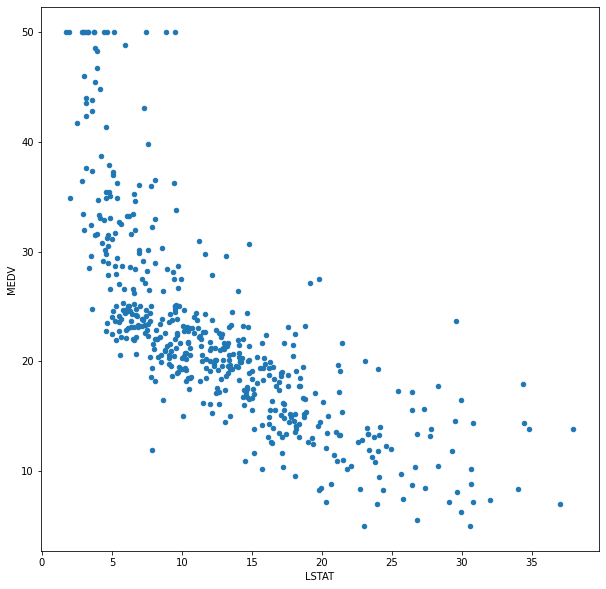

In [7]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10))

## Simple linear regression model

Correlation only measures strength of association between two variables.

But in practice, we need to evaluate associations between one variable and a set of multiple variables. 

For example, the house price and other factors, RM and LSTAT.

Secondly, in many applications, we not only need to evaluate the strengths of association. For example, in stock trading high-frequency, we may need to estimate price change in next five seconds using information on price change, volume history of last 10 minutes.

That is, we need to build a equation between one variable, you try to estimate, called a response and other multiple variables which you use to estimate response called predictors. 

This equation is called a model. 

The mostly widely used equation for this is a linear regression model.

We use this model to estimate response variable which is also called prediction.

<img src="SimpleLinearModel.jpg" alt="Beautiful Sunset" >

Just like in confidence interval estimation, we assume the population is normal. 

For linear regression, we also make assumptions about response and predictors in population.

We assume that response variable in population are all normal. 

They have equal variance sigma square. But in the mean of the response variable is determined by predictors. 

In linear form, mu_i equal to beta_0, plus beta_1, times X_i. 

Like in confidence interval estimation, we use the samples to estimate a population parameter, mu. 

Similarly, we also use samples to estimate parameters of population, beta_0, beta_1, sigma. 

In conclusion, if we apply linear regression model, we assume there exists such a real pattern in population. More specifically, 

linearity: The mean of y is linearly determined by predictors. 

Independence: With different X, responses are independent. 

Normality: The random noise and y follow normal distributions. 

Equal variance: The variance y are all equal even if the values of predictors are different.

<img src="LRM_Equations.jpg" alt="Beautiful Sunset">

### Simple Lienar Regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

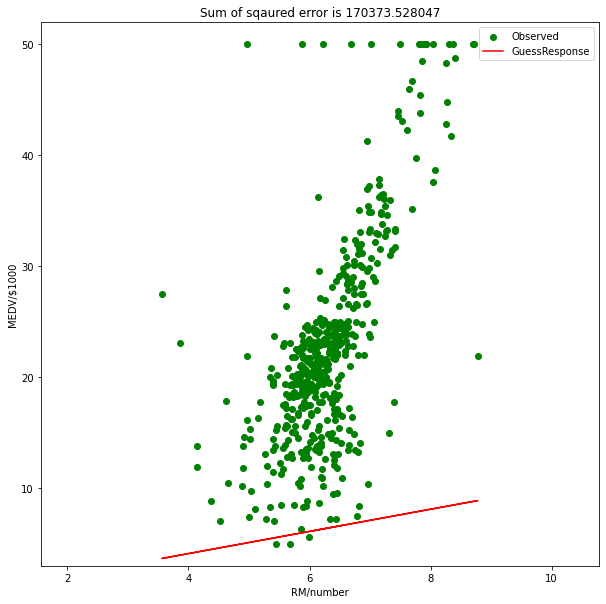

In [18]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

### Least Square Estimates 

In [13]:
import statsmodels.formula.api as smf

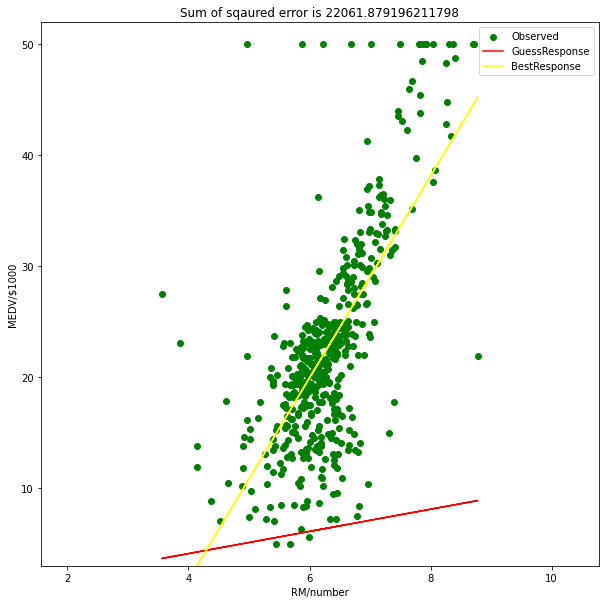

In [17]:
# Input the formula (refer to the lecture video 4.3)
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.ylabel('MEDV/$1000')
plt.xlabel('RM/number')
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

The yellow color line is a best fit line. 

Obviously, some square error is much smaller with best fit line. Hence, the criterion using least squares is reasonable. 



### Summary Table

Statsmodels also provide statistical evaluation of the model by using method summary. 

First, we need to pay attention to the p-value of slope. 

This p-value is a p-value for the two-tail test of a slope. 

For population mean, in two-tailed tests, p-value is to compute the probability for statistic to take a more extreme values on the two tails. Here, statistic is b_1 minus beta_1, divided by S_b_1 because population standard deviation for the estimate b_1 is unknown. We use a sample S_b1 for b_1 as a replacement. 

Hence this statistic follows a t-distribution with degree of freedom, m minus 2.

The reason for degree of freedom equal to m minus 2 is because we need the X-bar and y-bar to compute S_b_1 which cause the loss of two freedom.

If we can reject the null, freedom y is not equal to zero, it is equivalent to say that then predict RM is useful in predicting the median value of house. 

We only have five percent chance to include RM in the model wrongly. 

Second, we can get a confidence interval for the slope. By default, confidence level is 95 percent. Ninety-five percent of confidence interval for the slope is 8.279 and 9.925. 

This interval is located on the positive side of real line. Hence, the slope is positive with high chance which is consistent with a correlation of a scatter plot of our data.

In [16]:
#Refer to the P-value of RM, Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           2.49e-74
Time:                        18:58:33   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnostic of linear regression model

In [19]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

### Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

Linearity

<Axes: xlabel='LSTAT', ylabel='MEDV'>

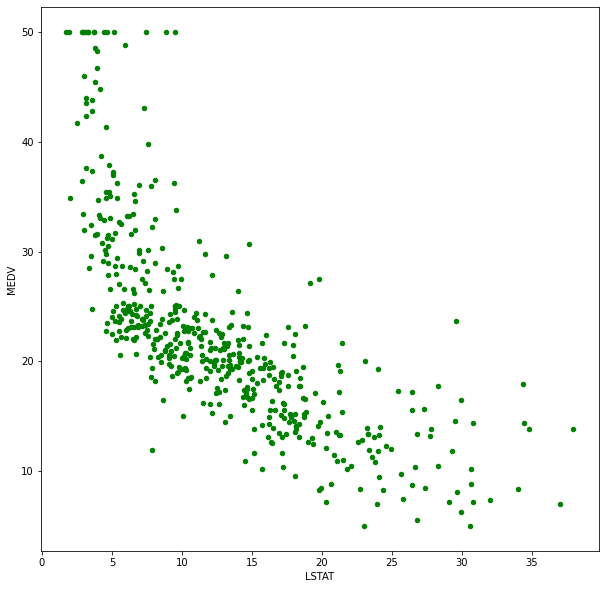

In [20]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='g')

Independence

In [21]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

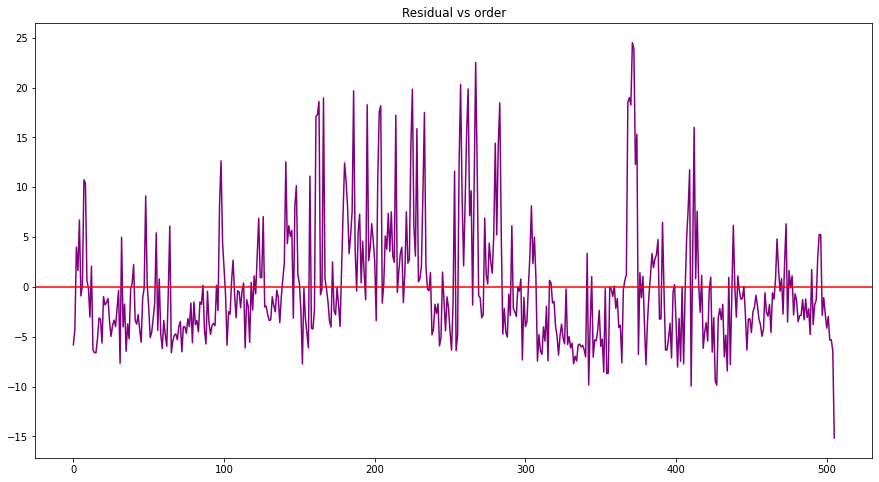

In [22]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [23]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        19:08:11   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Normality

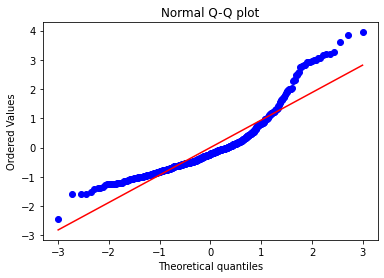

In [24]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

Equal Variance

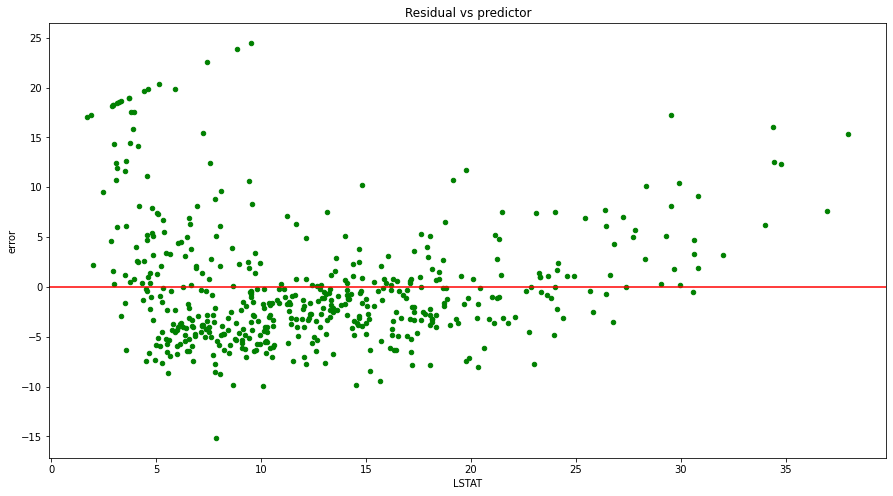

In [25]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.

## Multiple linear regression model


Let's mimic the process of building our trading model of SPY, base on the historical data of different stock markets

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# import all stock market data into DataFrame
aord = pd.read_csv('data/indice/ALLOrdinary.csv')
nikkei = pd.read_csv('data/indice/Nikkei225.csv')
hsi = pd.read_csv('data/indice/HSI.csv')
daxi = pd.read_csv('data/indice/DAXI.csv')
cac40 = pd.read_csv('data/indice/CAC40.csv')
sp500 = pd.read_csv('data/indice/SP500.csv')
dji = pd.read_csv('data/indice/DJI.csv')
nasdaq = pd.read_csv('data/indice/nasdaq_composite.csv')
spy = pd.read_csv('data/indice/SPY.csv')

In [30]:
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
1,2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2,2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
3,2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
4,2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


### Data Munging

In [31]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [32]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,15.500000,-71.679688,-464.320313,146.529999
1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-50.100097,-162.750000,-48.830078,144.910004
2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,99.370117,143.339996
3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-117.399903,216.951171,234.450195,141.809998
4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-27.500000,-354.060547,-158.209961,142.080002


In [33]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy          1
spy_lag1     1
sp500        1
nasdaq       1
dji          1
cac40        3
daxi        11
aord         2
hsi         57
nikkei      57
Price        0
dtype: int64

In [34]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [35]:
path_save = 'data/indice/indicepanel.csv'
indicepanel.to_csv(path_save)

In [36]:
print(indicepanel.shape)

(2678, 11)


### Step 2: Data Spliting

In [37]:
#split the data into (1)train set and (2)test set

Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


### Step 3: Explore the train data set

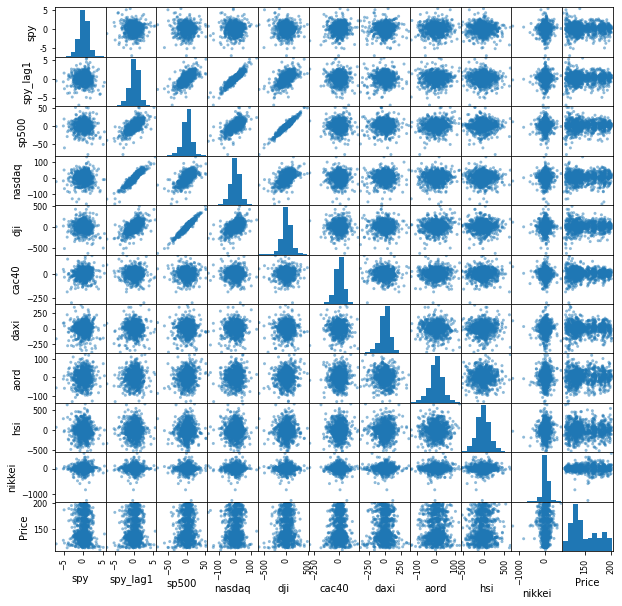

In [39]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association

from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

### Step 4: Check the correlation of each index between spy

In [40]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.011623
sp500      -0.018632
nasdaq      0.012333
dji        -0.037097
cac40       0.076886
daxi        0.019410
aord        0.048200
hsi        -0.038361
nikkei      0.035379
Name: spy, dtype: float64


In [41]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.133
Date:                Thu, 31 Aug 2023   Prob (F-statistic):             0.0245
Time:                        19:12:12   Log-Likelihood:                -1643.1
No. Observations:                1000   AIC:                             3306.
Df Residuals:                     990   BIC:                             3355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0798      0.040      1.993      0.047       0.001       0.158
spy_lag1      -0.1233      0.092     -1.340      0.180      -0.304       0.057
sp500          0.0178      0.014      1.273      0.203      -0.010       0.045
nasdaq         0.0047      0.004      1.240      0.215      -0.003       0.012
dji           -0.0023      0.001     -1.588      0.113      -0.005       0.001
cac40          0.0021      0.001      2.485      0.013       0.000       0.004
aord           0.0017      0.001      1.497      0.135      -0.001       0.004
daxi           0.0003      0.000      0.724      0.469      -0.001       0.001
nikkei         0.0004      0.000      1.293      0.196      -0.000       0.001
hsi           -0.0003      0.000     -1.412      0.158      -0.001       0.000
==============================================================================
Omnibus:                       85.811   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.379
Skew:                          -0.444   Prob(JB):                     7.73e-52
Kurtosis:                       5.205   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5: Make prediction

In [42]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

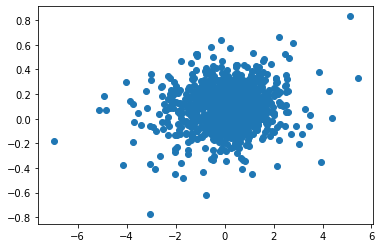

In [43]:
plt.scatter(Train['spy'], Train['PredictedY'])

### Step 6: Model evaluation - Statistical standard

In [44]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [45]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [46]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.010102,0.013609
RMSE,1.257534,1.759693


## Evaluate Strategy

In [48]:
indicepanel = pd.read_csv('data/indice/indicepanel.csv')
indicepanel.head()

,Unnamed: 0,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-50.100097,-162.750000,-48.830078,144.910004
1,2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,99.370117,143.339996
2,3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-117.399903,216.951171,234.450195,141.809998
3,4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-27.500000,-354.060547,-158.209961,142.080002
4,5,0.589997,-2.990006,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-33.899902,768.359375,-308.639649,139.089996


In [49]:
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]

In [50]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

In [51]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

### Profit of Signal-based strategy

In [52]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  127.99984299999947


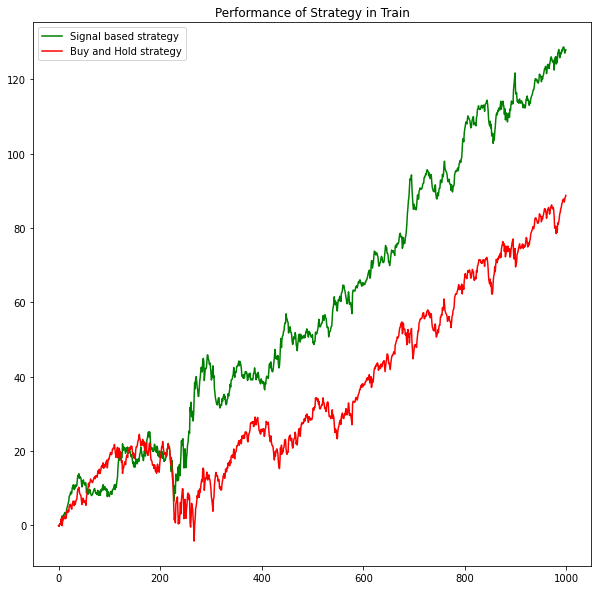

In [53]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [54]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  15.91051800000011


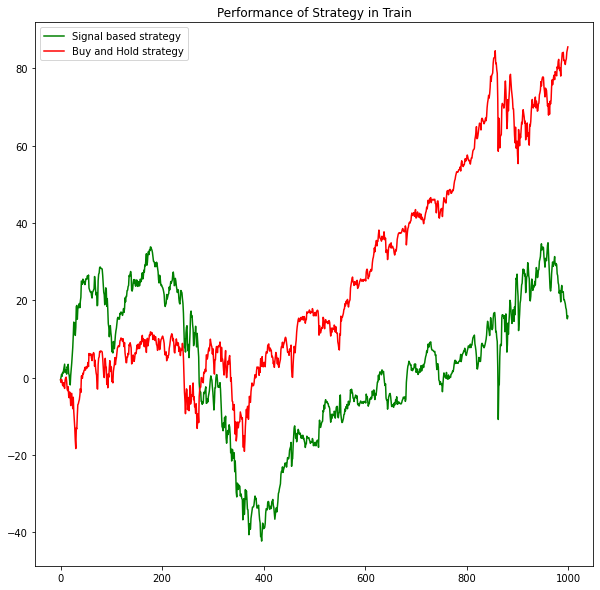

In [55]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

### Evaluation of model - Practical Standard

We introduce two common practical standards - **Sharpe Ratio**, **Maximum Drawdown** to evaluate our model performance

In [56]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [57]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.09401252260740608
Yearly Sharpe Ratio is  1.4924025296702046


In [58]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.009157915628667352
Yearly Sharpe Ratio is  0.1453774036869933


In [59]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.13471710175416493


In [60]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.3234838620552924
